# 파이썬 PATH 초기화

In [ ]:
!echo $PYTHONPATH
%env PYTHONPATH=

/env/python
env: PYTHONPATH=


# 아나콘다 설치 및 SYSTEMPATH 적용

In [ ]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local 
!conda install -q -y --prefix /usr/local python=3.6 ujson

In [ ]:
import sys
sys.path.insert(0, "/usr/local/lib/python3.6/site-packages/")
sys.path

import ujson
print(ujson.dumps({1:2}))

{"1":2}


In [ ]:
!python -V
!which python
!ls -al /usr/bin/python

In [ ]:
!apt-get install libpcl-dev

In [ ]:
!conda config --add channels conda-forge
!conda install -c sirokujira python-pcl #v0.3

In [ ]:
!sudo apt-get install pcl-tools

# libboost 버전이 일치 하지 않으면 생기는 오류 심벌릭 링크를 적용하여 해결

In [ ]:
!sudo ln -s /usr/lib/x86_64-linux-gnu/libboost_system.so.1.65.1 /usr/lib/x86_64-linux-gnu/libboost_system.so.1.54.0
!sudo ln -s /usr/lib/x86_64-linux-gnu/libboost_filesystem.so.1.65.1 /usr/lib/x86_64-linux-gnu/libboost_filesystem.so.1.54.0
!sudo ln -s /usr/lib/x86_64-linux-gnu/libboost_thread.so.1.65.1 /usr/lib/x86_64-linux-gnu/libboost_thread.so.1.54.0
!sudo ln -s /usr/lib/x86_64-linux-gnu/libboost_iostreams.so.1.65.1 /usr/lib/x86_64-linux-gnu/libboost_iostreams.so.1.54.0

In [ ]:
!sudo ln -s /usr/lib/x86_64-linux-gnu/libboost_filesystem.so.1.65.1 /usr/lib/x86_64-linux-gnu/libboost_filesystem.so.1.54.0

In [ ]:
!sudo ln -s /usr/lib/x86_64-linux-gnu/libboost_thread.so.1.65.1 /usr/lib/x86_64-linux-gnu/libboost_thread.so.1.54.0

In [ ]:
!sudo ln -s /usr/lib/x86_64-linux-gnu/libboost_iostreams.so.1.65.1 /usr/lib/x86_64-linux-gnu/libboost_iostreams.so.1.54.0

# ImportError: No module named 'numpy.testing.nosetester' 해결법

In [ ]:
!conda install -c conda-forge numpy=1.17
!conda install -c conda-forge scipy==1.1.0
!conda install -c conda-forge scikit-learn==0.21.3


In [ ]:
import pcl

# open 3D 설치

In [ ]:
#conda
!conda install -c open3d-admin open3d

#ROS 설치(잘 안됨 python 2.7사용 할 경우만 설치)
http://wiki.ros.org/noetic/Installation/Ubuntu

In [ ]:
# Ubuntu 18용 Melodic 
$ wget https://raw.githubusercontent.com/ROBOTIS-GIT/robotis_tools/master/install_ros_melodic.sh
$ chmod +x install_ros_melodic.sh
$ ./install_ros_melodic.sh

In [ ]:
# create a new environmnet named ros
!conda install -c conda-forge ros-roslib
python==3.6  # select your desired Python version here (2.7, 3.6, 3.7)
!conda install -c conda-forge ros-rospy
python==3.6 

#pcl_helper.py (ros가 있어야 작동)
random_color_gen() : Generates a random set of r,g,b values
Return: a 3-tuple with r,g,b values (range 0-255)
ros_to_pcl(sensor_msgs/PointCloud2) : Converts sensor_msgs/PointCloud2 to XYZRGB Point Cloud
Return: pcl.PointCloud_PointXYZRGB
pcl_to_ros(pcl.PointCloud_PointXYZRGB): Converts XYZRGB Point Cloud to sensor_msgs/PointCloud2
Return: sensor_msgs/PointCloud2
XYZRGB_to_XYZ(XYZRGB_cloud): Converts XYZRGB Point Cloud to XYZ Point CLoud
Return: pcl.PointCloud
XYZ_to_XYZRGB(XYZ_cloud, color):Takes a 3-tuple as color and adds it to XYZ Point Cloud
Return: pcl.PointCloud_PointXYZRGB
rgb_to_float(color):Converts 3-tuple color to a single float32
Return: rgb packed as a single float32
get_color_list(cluster_count) : Creates a list of 3-tuple (rgb) with length of the list = cluster_count
Return: get_color_list.color_list

In [ ]:
#!/usr/bin/env python

# Copyright (C) 2017 Udacity Inc.
#
# This file is part of Robotic Arm: Pick and Place project for Udacity
# Robotics nano-degree program
#
# All Rights Reserved.

# Author: Harsh Pandya

# Import modules
import rospy
import pcl
import numpy as np
import ctypes
import struct

from std_msgs.msg import Header
from random import randint


def random_color_gen():
    """ Generates a random color
        Args: None
        Returns:
            list: 3 elements, R, G, and B
    """
    r = randint(0, 255)
    g = randint(0, 255)
    b = randint(0, 255)
    return [r, g, b]


def ros_to_pcl(ros_cloud):
    """ Converts a ROS PointCloud2 message to a pcl PointXYZRGB
        Args:
            ros_cloud (PointCloud2): ROS PointCloud2 message
        Returns:
            pcl.PointCloud_PointXYZRGB: PCL XYZRGB point cloud
    """
    points_list = []

    for data in pc2.read_points(ros_cloud, skip_nans=True):
        points_list.append([data[0], data[1], data[2], data[3]])

    pcl_data = pcl.PointCloud_PointXYZRGB()
    pcl_data.from_list(points_list)

    return pcl_data


def pcl_to_ros(pcl_array):
    """ Converts a pcl PointXYZRGB to a ROS PointCloud2 message
        Args:
            pcl_array (PointCloud_PointXYZRGB): A PCL XYZRGB point cloud
        Returns:
            PointCloud2: A ROS point cloud
    """
    ros_msg = PointCloud2()

    ros_msg.header.stamp = rospy.Time.now()
    ros_msg.header.frame_id = "world"

    ros_msg.height = 1
    ros_msg.width = pcl_array.size

    ros_msg.fields.append(PointField(
                            name="x",
                            offset=0,
                            datatype=PointField.FLOAT32, count=1))
    ros_msg.fields.append(PointField(
                            name="y",
                            offset=4,
                            datatype=PointField.FLOAT32, count=1))
    ros_msg.fields.append(PointField(
                            name="z",
                            offset=8,
                            datatype=PointField.FLOAT32, count=1))
    ros_msg.fields.append(PointField(
                            name="rgb",
                            offset=16,
                            datatype=PointField.FLOAT32, count=1))

    ros_msg.is_bigendian = False
    ros_msg.point_step = 32
    ros_msg.row_step = ros_msg.point_step * ros_msg.width * ros_msg.height
    ros_msg.is_dense = False
    buffer = []

    for data in pcl_array:
        s = struct.pack('>f', data[3])
        i = struct.unpack('>l', s)[0]
        pack = ctypes.c_uint32(i).value

        r = (pack & 0x00FF0000) >> 16
        g = (pack & 0x0000FF00) >> 8
        b = (pack & 0x000000FF)

        buffer.append(struct.pack('ffffBBBBIII', data[0], data[1], data[2], 1.0, b, g, r, 0, 0, 0, 0))

    ros_msg.data = "".join(buffer)

    return ros_msg


def XYZRGB_to_XYZ(XYZRGB_cloud):
    """ Converts a PCL XYZRGB point cloud to an XYZ point cloud (removes color info)
        Args:
            XYZRGB_cloud (PointCloud_PointXYZRGB): A PCL XYZRGB point cloud
        Returns:
            PointCloud_PointXYZ: A PCL XYZ point cloud
    """
    XYZ_cloud = pcl.PointCloud()
    points_list = []

    for data in XYZRGB_cloud:
        points_list.append([data[0], data[1], data[2]])

    XYZ_cloud.from_list(points_list)
    return XYZ_cloud


def XYZ_to_XYZRGB(XYZ_cloud, color):
    """ Converts a PCL XYZ point cloud to a PCL XYZRGB point cloud
        All returned points in the XYZRGB cloud will be the color indicated
        by the color parameter.
        Args:
            XYZ_cloud (PointCloud_XYZ): A PCL XYZ point cloud
            color (list): 3-element list of integers [0-255,0-255,0-255]
        Returns:
            PointCloud_PointXYZRGB: A PCL XYZRGB point cloud
    """
    XYZRGB_cloud = pcl.PointCloud_PointXYZRGB()
    points_list = []

    float_rgb = rgb_to_float(color)

    for data in XYZ_cloud:
        points_list.append([data[0], data[1], data[2], float_rgb])

    XYZRGB_cloud.from_list(points_list)
    return XYZRGB_cloud


def rgb_to_float(color):
    """ Converts an RGB list to the packed float format used by PCL
        From the PCL docs:
        "Due to historical reasons (PCL was first developed as a ROS package),
         the RGB information is packed into an integer and casted to a float"
        Args:
            color (list): 3-element list of integers [0-255,0-255,0-255]
        Returns:
            float_rgb: RGB value packed as a float
    """
    hex_r = (0xff & color[0]) << 16
    hex_g = (0xff & color[1]) << 8
    hex_b = (0xff & color[2])

    hex_rgb = hex_r | hex_g | hex_b

    float_rgb = struct.unpack('f', struct.pack('i', hex_rgb))[0]

    return float_rgb


def float_to_rgb(float_rgb):
    """ Converts a packed float RGB format to an RGB list
        Args:
            float_rgb: RGB value packed as a float
        Returns:
            color (list): 3-element list of integers [0-255,0-255,0-255]
    """
    s = struct.pack('>f', float_rgb)
    i = struct.unpack('>l', s)[0]
    pack = ctypes.c_uint32(i).value

    r = (pack & 0x00FF0000) >> 16
    g = (pack & 0x0000FF00) >> 8
    b = (pack & 0x000000FF)

    color = [r,g,b]

    return color


def get_color_list(cluster_count):
    """ Returns a list of randomized colors
        Args:
            cluster_count (int): Number of random colors to generate
        Returns:
            (list): List containing 3-element color lists
    """
    if (cluster_count > len(get_color_list.color_list)):
        for i in xrange(len(get_color_list.color_list), cluster_count):
            get_color_list.color_list.append(random_color_gen())
    return get_color_list.color_list

#pts to pcd


In [ ]:
filename="DamagedBeam.pts"
from numpy import loadtxt
from numpy import savetxt
lines = loadtxt("/content/sample_data/지면제거data.pts",skiprows=1)
size=str(lines[:,0].size)
header = "VERSION .7\nFIELDS x y z\nSIZE 4 4 4\nTYPE F F F\nCOUNT 1 1 1\nWIDTH "+size+"\nHEIGHT 1\nVIEWPOINT 0 0 0 1 0 0 0\nPOINTS "+size+"\nDATA ascii"
pcd=lines[:,[0,1,2]]
savetxt("/content/sample_data/all.pcd", pcd, fmt="%f",header=header,comments='')


pts 파일 읽는 코드

In [ ]:
# pts_loader provides a load() method to read data from .pts files of
# point clouds
#
# --------------------------------------------------------
# pts_loader
# Licensed under The MIT License [see LICENSE.md for details]
# Copyright (C) 2017 Samuel Albanie 
# --------------------------------------------------------

def load(path):
    """takes as input the path to a .pts and returns a list of 
	tuples of floats containing the points in in the form:
	[(x_0, y_0, z_0),
	 (x_1, y_1, z_1),
	 ...
	 (x_n, y_n, z_n)]"""
    with open(path) as f:
        rows = [rows.strip() for rows in f]
    
    """Use the curly braces to find the start and end of the point data""" 
    head = rows.index('{') + 1
    tail = rows.index('}')

    """Select the point data split into coordinates"""
    raw_points = rows[head:tail]
    coords_set = [point.split() for point in raw_points]

    """Convert entries from lists of strings to tuples of floats"""
    points = [tuple([float(point) for point in coords]) for coords in coords_set]
    return points

Euclidean클러스터링


In [ ]:
import pcl
#!/usr/bin/env python

# Copyright (C) 2017 Udacity Inc.
#
# This file is part of Robotic Arm: Pick and Place project for Udacity
# Robotics nano-degree program
#
# All Rights Reserved.

# Author: Harsh Pandya

# Import modules

import pcl
import numpy as np
import ctypes
import struct
from random import randint


def random_color_gen():
    """ Generates a random color
        Args: None
        Returns:
            list: 3 elements, R, G, and B
    """
    r = randint(0, 255)
    g = randint(0, 255)
    b = randint(0, 255)
    return [r, g, b]




def XYZRGB_to_XYZ(XYZRGB_cloud):
    """ Converts a PCL XYZRGB point cloud to an XYZ point cloud (removes color info)
        Args:
            XYZRGB_cloud (PointCloud_PointXYZRGB): A PCL XYZRGB point cloud
        Returns:
            PointCloud_PointXYZ: A PCL XYZ point cloud
    """
    XYZ_cloud = pcl.PointCloud()
    points_list = []

    for data in XYZRGB_cloud:
        points_list.append([data[0], data[1], data[2]])

    XYZ_cloud.from_list(points_list)
    return XYZ_cloud


def XYZ_to_XYZRGB(XYZ_cloud, color):
    """ Converts a PCL XYZ point cloud to a PCL XYZRGB point cloud
        All returned points in the XYZRGB cloud will be the color indicated
        by the color parameter.
        Args:
            XYZ_cloud (PointCloud_XYZ): A PCL XYZ point cloud
            color (list): 3-element list of integers [0-255,0-255,0-255]
        Returns:
            PointCloud_PointXYZRGB: A PCL XYZRGB point cloud
    """
    XYZRGB_cloud = pcl.PointCloud_PointXYZRGB()
    points_list = []

    float_rgb = rgb_to_float(color)

    for data in XYZ_cloud:
        points_list.append([data[0], data[1], data[2], float_rgb])

    XYZRGB_cloud.from_list(points_list)
    return XYZRGB_cloud


def rgb_to_float(color):
    """ Converts an RGB list to the packed float format used by PCL
        From the PCL docs:
        "Due to historical reasons (PCL was first developed as a ROS package),
         the RGB information is packed into an integer and casted to a float"
        Args:
            color (list): 3-element list of integers [0-255,0-255,0-255]
        Returns:
            float_rgb: RGB value packed as a float
    """
    hex_r = (0xff & color[0]) << 16
    hex_g = (0xff & color[1]) << 8
    hex_b = (0xff & color[2])

    hex_rgb = hex_r | hex_g | hex_b

    float_rgb = struct.unpack('f', struct.pack('i', hex_rgb))[0]

    return float_rgb


def float_to_rgb(float_rgb):
    """ Converts a packed float RGB format to an RGB list
        Args:
            float_rgb: RGB value packed as a float
        Returns:
            color (list): 3-element list of integers [0-255,0-255,0-255]
    """
    s = struct.pack('>f', float_rgb)
    i = struct.unpack('>l', s)[0]
    pack = ctypes.c_uint32(i).value

    r = (pack & 0x00FF0000) >> 16
    g = (pack & 0x0000FF00) >> 8
    b = (pack & 0x000000FF)

    color = [r,g,b]

    return color


def get_color_list(cluster_count):
    """ Returns a list of randomized colors
        Args:
            cluster_count (int): Number of random colors to generate
        Returns:
            (list): List containing 3-element color lists
    """
    if (cluster_count > len(get_color_list.color_list)):
        for i in xrange(len(get_color_list.color_list), cluster_count):
            get_color_list.color_list.append(random_color_gen())
    return get_color_list.color_list

def do_euclidean_clustering(white_cloud):
    '''
    :param cloud_objects:
    :return: cluster cloud and cluster indices
    '''
    tree = white_cloud.make_kdtree()

    # Create Cluster-Mask Point Cloud to visualize each cluster separately
    ec = white_cloud.make_EuclideanClusterExtraction()
    ec.set_ClusterTolerance(0.01)
    ec.set_MinClusterSize(20)
    ec.set_MaxClusterSize(40)
    ec.set_SearchMethod(tree)
    cluster_indices = ec.Extract()
    cluster_color = get_color_list(len(cluster_indices))
    color_cluster_point_list = []

    for j, indices in enumerate(cluster_indices):
        for i, indice in enumerate(indices):
            color_cluster_point_list.append([white_cloud[indice][0],
                                             white_cloud[indice][1],
                                             white_cloud[indice][2],
                                             rgb_to_float(cluster_color[j])])

    cluster_cloud = pcl.PointCloud_PointXYZRGB()
    cluster_cloud.from_list(color_cluster_point_list)
    
    return cluster_cloud,cluster_indices

# Euclidean Clustering

get_color_list.color_list = []

white_cloud = pcl.load("/content/TEST3_.pcd")
print(white_cloud)

cluster_cloud,cluster_indices = do_euclidean_clustering(white_cloud)

print(cluster_cloud)
print(cluster_indices)






k_means 클러스터링

--------------------------data--------------------------
             X        Y        Z
0      5.73202 -0.74213  2.00003
1     -5.85224 -3.51000  2.00003
2     -1.55024 -6.14023  2.00004
3     -0.15085 -2.35509  2.00004
4      5.57676  5.75816  2.00004
...        ...      ...      ...
46770 -6.55157  0.85491  2.49994
46771 -0.05673 -2.31840  2.49994
46772  1.28519  4.79566  2.49997
46773  1.36988  2.13100  2.49999
46774  1.40314  2.09217  2.50002

[46775 rows x 3 columns]
[8918.818638159231, 6546.632383378622, 4855.196090907267, 3002.0173563139797, 2239.235594644138, 1748.144720312152, 1626.6155224260751, 1460.955918995214, 1391.2903351288062, 1301.3891569791792, 1246.21115464513, 1164.3707165888493, 1115.920238694314, 1093.5163534876615, 1043.6622315020747, 996.3967199567164, 934.3893917206133, 924.1813403519259, 884.4158394602977, 844.7314126737379]


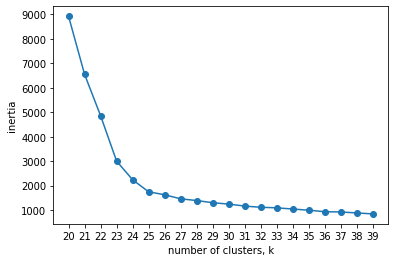

--------------------------max, predic 추가한 df--------------------------
Num of K:  23
             X        Y        Z  predict
0      5.73202 -0.74213  2.00003        3
1     -5.85224 -3.51000  2.00003       21
2     -1.55024 -6.14023  2.00004        1
3     -0.15085 -2.35509  2.00004        5
4      5.57676  5.75816  2.00004        0
...        ...      ...      ...      ...
46770 -6.55157  0.85491  2.49994        2
46771 -0.05673 -2.31840  2.49994        5
46772  1.28519  4.79566  2.49997        9
46773  1.36988  2.13100  2.49999        4
46774  1.40314  2.09217  2.50002        4

[46775 rows x 4 columns]
--------------------------predict기반 점의 개수--------------------------
predict
0     1585
1     3014
2     2159
3     2748
4     6585
5     7707
6     2614
7     2998
8      346
9     3644
10    1439
11     660
12    1163
13     446
14     831
15     659
16    2094
17    1587
18    1144
19     794
20     739
21    1037
22     497
23     285
dtype: int64


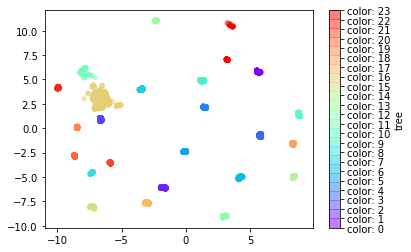

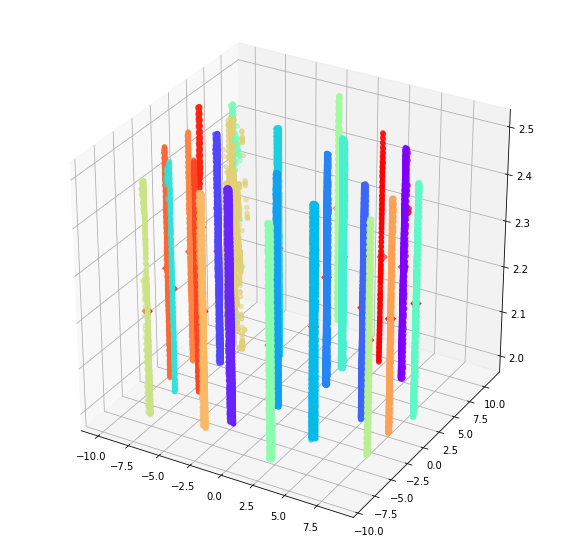

--------------------------정렬 결과--------------------------
             X        Y        Z  predict
46764  3.15844  7.07280  2.49989       23
46638  3.25240  7.02949  2.49837       23
46608  3.16876  7.06997  2.49803       23
45981  3.15859  7.07331  2.49085       23
45731  3.17004  7.06954  2.48807       23
...        ...      ...      ...      ...
130    5.52517  5.86188  2.00136        0
79     5.52424  5.87092  2.00075        0
30     5.73904  5.71625  2.00030        0
28     5.59084  5.74823  2.00027        0
4      5.57676  5.75816  2.00004        0

[46775 rows x 4 columns]
--------------------------index별 가장 큰 Z값--------------------------
             X         Y        Z  predict
46759  5.74751   5.72729  2.49986        0
46730 -1.78271  -6.01472  2.49945        1
46770 -6.55157   0.85491  2.49994        2
46755  5.77071  -0.65376  2.49981        3
46774  1.40314   2.09217  2.50002        4
46771 -0.05673  -2.31840  2.49994        5
46752  4.12129  -5.15083  2.49975        6
4

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import pcl


pc = pcl.load("/content/sample_data/result2_.pcd") # "pc.from_file" Deprecated
pc_array = pc.to_array() # pc to Numpy

#cloud = pcl.load_XYZRGBA("tabletop.pcd")
# Read Tree Sample data


data = pd.DataFrame(pc_array)
data.columns=['X','Y','Z']

print('--------------------------data--------------------------')  

print(data)


# we can find appropriate the number of clusters with Inertia
ks = range(20, 40) # range denpend on k's number
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(data)
    inertias.append(model.inertia_)

print(inertias)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

k_num = 0
for i in range(0, len(inertias)):
    if (inertias[i] - inertias[i+1]) <= 1000:
        k_num = (i+1)+20
        break
      
# create model and prediction
#k_num = int(input("input k: "))
model = KMeans(n_clusters=k_num, algorithm='auto')
model.fit(data)
predict = pd.DataFrame(model.predict(data))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([data,predict],axis=1)
max = -1
for index in r.predict:
    if max < index:
        max = index

print('--------------------------max, predic 추가한 df--------------------------')
print("Num of K: ", max)
print(r)

# predict 기반 그룹화
groups = r.groupby('predict').size()
print('--------------------------predict기반 점의 개수--------------------------')
print(groups)


# Clustering data visualization
#2D plot
plt.scatter(r['X'], r['Y'], c=r['predict'], s=20, cmap=plt.cm.get_cmap('rainbow', k_num), alpha=0.5)
plt.colorbar(ticks=range(k_num), format='color: %d', label='tree')
# 3d plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') # Axe3D object


ax.scatter(r['X'], r['Y'], r['Z'], c=r['predict'], cmap=plt.cm.get_cmap('rainbow', k_num), alpha=0.5)

centers = pd.DataFrame(model.cluster_centers_,columns=['X','Y','Z'])
center_x = centers['X']
center_y = centers['Y']
center_z = centers['Z']

# if you want to see 2D centroid plot, delete below '#'
# plt.scatter(center_x,center_y,center_z, marker='D',c='b')

# if you want to see 3D centroid plot
ax.scatter(center_x,center_y,center_z, s=50, marker='D', c='r')
plt.show()

#kdtree 이용 탐색

kdtree = pc.make_kdtree_flann()

searchPoint = pcl.PointCloud()
searchPoints = np.zeros((1,3), dtype=np.float32)

# 정렬
df_sorted_by_values = r.sort_values(by=['predict', 'Z'] ,ascending=False)

# 정렬 결과 출력.
print('--------------------------정렬 결과--------------------------')
print(df_sorted_by_values)

# 정렬한 나무 밑둥 데이터 중에 라벨 별로 가장 큰 값을 가지는 Z 값 추출
print('--------------------------index별 가장 큰 Z값--------------------------')
max_value = df_sorted_by_values.loc[df_sorted_by_values.groupby(['predict'])['Z'].idxmax()]
print(max_value)

searchPoint = pcl.PointCloud()

allPc = pcl.load("/content/sample_data/all.pcd") # "pc.from_file" Deprecated
allPc_array = allPc.to_array() # pc to Numpy
kindex = 0

for mzi in max_value.index.values:
    kcount = 0

    searchPoints = np.zeros((1,3), dtype=np.float32)
    searchPoints[0][0] = max_value.loc[mzi, 'X']
    searchPoints[0][1] = max_value.loc[mzi, 'Y']
    searchPoints[0][2] = max_value.loc[mzi, 'Z']

    searchPoint.from_array(searchPoints) # 초기 z의 최대 값
    
    
    k = 1
    print('--------------------------' +str(kindex)+ '--------------------------')
    print('Neighbors within radius search at (' + str(searchPoint[0][0]) + ' ' + str(
            searchPoint[0][1]) + ' ' + str(searchPoint[0][2]) + ') with k =' + str(k))

    ss = pcl.PointCloud()
    ans = -1000000
    sMax = -1000000

    while(True):
        # radius neighbor search
        print(str(kcount) + '번째 시도')       
        ss2 = np.zeros((1,3), dtype = np.float32)

        if kcount == 0: 
             [ind, sqdist] = kdtree.nearest_k_search_for_cloud(searchPoint, k)
        
        else:
             [ind, sqdist] = kdtree.nearest_k_search_for_cloud(ss, k)

        for i in range(0, ind.size):
             
             # 탐색값중 최고 z값 찾아서 searchPoints 배열 만들어서 넣어주고 searchPoint(pcd)에 다시 넣어주기 
            if sMax < allPc_array[ind[0][i]][2]:

                ss2[0][0] = allPc_array[ind[0][i]][0]   
                ss2[0][1] = allPc_array[ind[0][i]][1]  
                ss2[0][2] = allPc_array[ind[0][i]][2]
                sMax = ss2[0][2]
                ss.from_array(ss2)

            print('(' + str(allPc_array[ind[0][i]][0]) + ' ' + str(allPc_array[ind[0][i]][1]) + ' ' + str( allPc_array[ind[0][i]][2]) + ' (squared distance: ' + str(sqdist[0][i]) + ')')
        
        print(str(kcount) + '번째 시도에서 최대 z값을 가진 좌표: ' + '(' + str(ss2[0][0]) + ' ' + str(ss2[0][1]) + ' ' + str(ss2[0][2])+')')
        print('------------------------')
        kcount+=1    
        if ans == sMax: break
        else: ans = sMax

    print('*******'+ str(kindex) + '번째 나무의 최대 높이 ' + str(ans))
    kindex+=1




DBscan 클러스터링


In [ ]:
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pcl

pc = pcl.load("/content/sample_data/result2_.pcd") # "pc.from_file" Deprecated
pc_array = pc.to_array() # pc to Numpy
#cloud = pcl.load_XYZRGBA("tabletop.pcd")
# Read Tree Sample data

data = pd.DataFrame(pc_array)
data.columns=['X','Y','Z']

print(data)


# create model and prediction
model = DBSCAN(min_samples=6)
predict = pd.DataFrame(model.fit_predict(data))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([data,predict],axis=1)
print(r)


# scatter plot
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(r['X'], r['Y'], r['Z'], c=r['predict'], alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



# octree search 알고리즘

In [ ]:
import pcl
import numpy as np
import random

cloud = pcl.load("/content/sample_data/result2_.pcd")
resolution = 0.2
octree = cloud.make_octreeSearch(resolution)
octree.add_points_from_input_cloud()


searchPoint = pcl.PointCloud()
searchPoints = np.zeros((1, 3), dtype=np.float32)
searchPoints[0][0] = cloud[3000][0]
searchPoints[0][1] = cloud[3000][1]
searchPoints[0][2] = cloud[3000][2]
#searchPoints = (cloud[3000][0], cloud[3000][1], cloud[3000][2])

searchPoint.from_array(searchPoints)


ind = octree.VoxelSearch(searchPoint)

print('Neighbors within voxel search at (' + str(searchPoint[0][0]) + ' ' + str(
    searchPoint[0][1]) + ' ' + str(searchPoint[0][2]) + ')')

for i in range(0, 5):#range(0, ind.size):
    print('index = ' + str(ind[i]))
    print('(' + str(cloud[ind[i]][0]) + ' ' +
          str(cloud[ind[i]][1]) + ' ' + str(cloud[ind[i]][2]) + ')')
    
#K nearest neighbor search
K = 10
print('K nearest neighbor search at (' + str(searchPoint[0][0]) + ' ' + str(
        searchPoint[0][1]) + ' ' + str(searchPoint[0][2]) + ') with K=' + str(K))    


[ind, sqdist] = octree.nearest_k_search_for_cloud(searchPoint, K)
for i in range(0, ind.size):
    print('(' + str(cloud[ind[0][i]][0]) + ' ' + str(cloud[ind[0][i]][1]) + ' ' + str(
        cloud[ind[0][i]][2]) + ' (squared distance: ' + str(sqdist[0][i]) + ')')
    



#KdTree 알고리즘

In [ ]:
import pcl
import numpy as np
import random
cloud = pcl.load("/content/sample_data/result2_.pcd")
kdtree = cloud.make_kdtree_flann()

searchPoint = pcl.PointCloud()
searchPoints = np.zeros((1,3), dtype=np.float32)
searchPoints[0][0] = cloud[3000][0]
searchPoints[0][1] = cloud[3000][1]
searchPoints[0][2] = cloud[3000][2]

searchPoint.from_array(searchPoints)

# K nearest neighbor search
K = 10
print('K nearest neighbor search at (' + str(searchPoint[0][0]) + ' ' + str(
        searchPoint[0][1]) + ' ' + str(searchPoint[0][2]) + ') with K=' + str(K))

[ind, sqdist] = kdtree.nearest_k_search_for_cloud(searchPoint, K)
for i in range(0, ind.size):
    print('(' + str(cloud[ind[0][i]][0]) + ' ' + str(cloud[ind[0][i]][1]) + ' ' + str(
        cloud[ind[0][i]][2]) + ' (squared distance: ' + str(sqdist[0][i]) + ')')

# Neighbors within radius search
radius = 0.02
print('Neighbors within radius search at (' + str(searchPoint[0][0]) + ' ' + str(
        searchPoint[0][1]) + ' ' + str(searchPoint[0][2]) + ') with radius=' + str(radius))

[ind, sqdist] = kdtree.radius_search_for_cloud(searchPoint, radius)
for i in range(0, ind.size):
    print('(' + str(cloud[ind[0][i]][0]) + ' ' + str(cloud[ind[0][i]][1]) + ' ' + str(
        cloud[ind[0][i]][2]) + ' (squared distance: ' + str(sqdist[0][i]) + ')')

# colab런타임 해제 방지 (f12눌러서 콘솔에 복사 붙여넣기)

In [ ]:
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)